<>:60: SyntaxWarning: invalid escape sequence '\l'
<>:60: SyntaxWarning: invalid escape sequence '\l'
C:\Users\viklund\AppData\Local\Temp\ipykernel_11168\2287663260.py:60: SyntaxWarning: invalid escape sequence '\l'
  axs[0][0].plot(f,Z.real,label = f'$\lambda = {lambdas[i]}$')


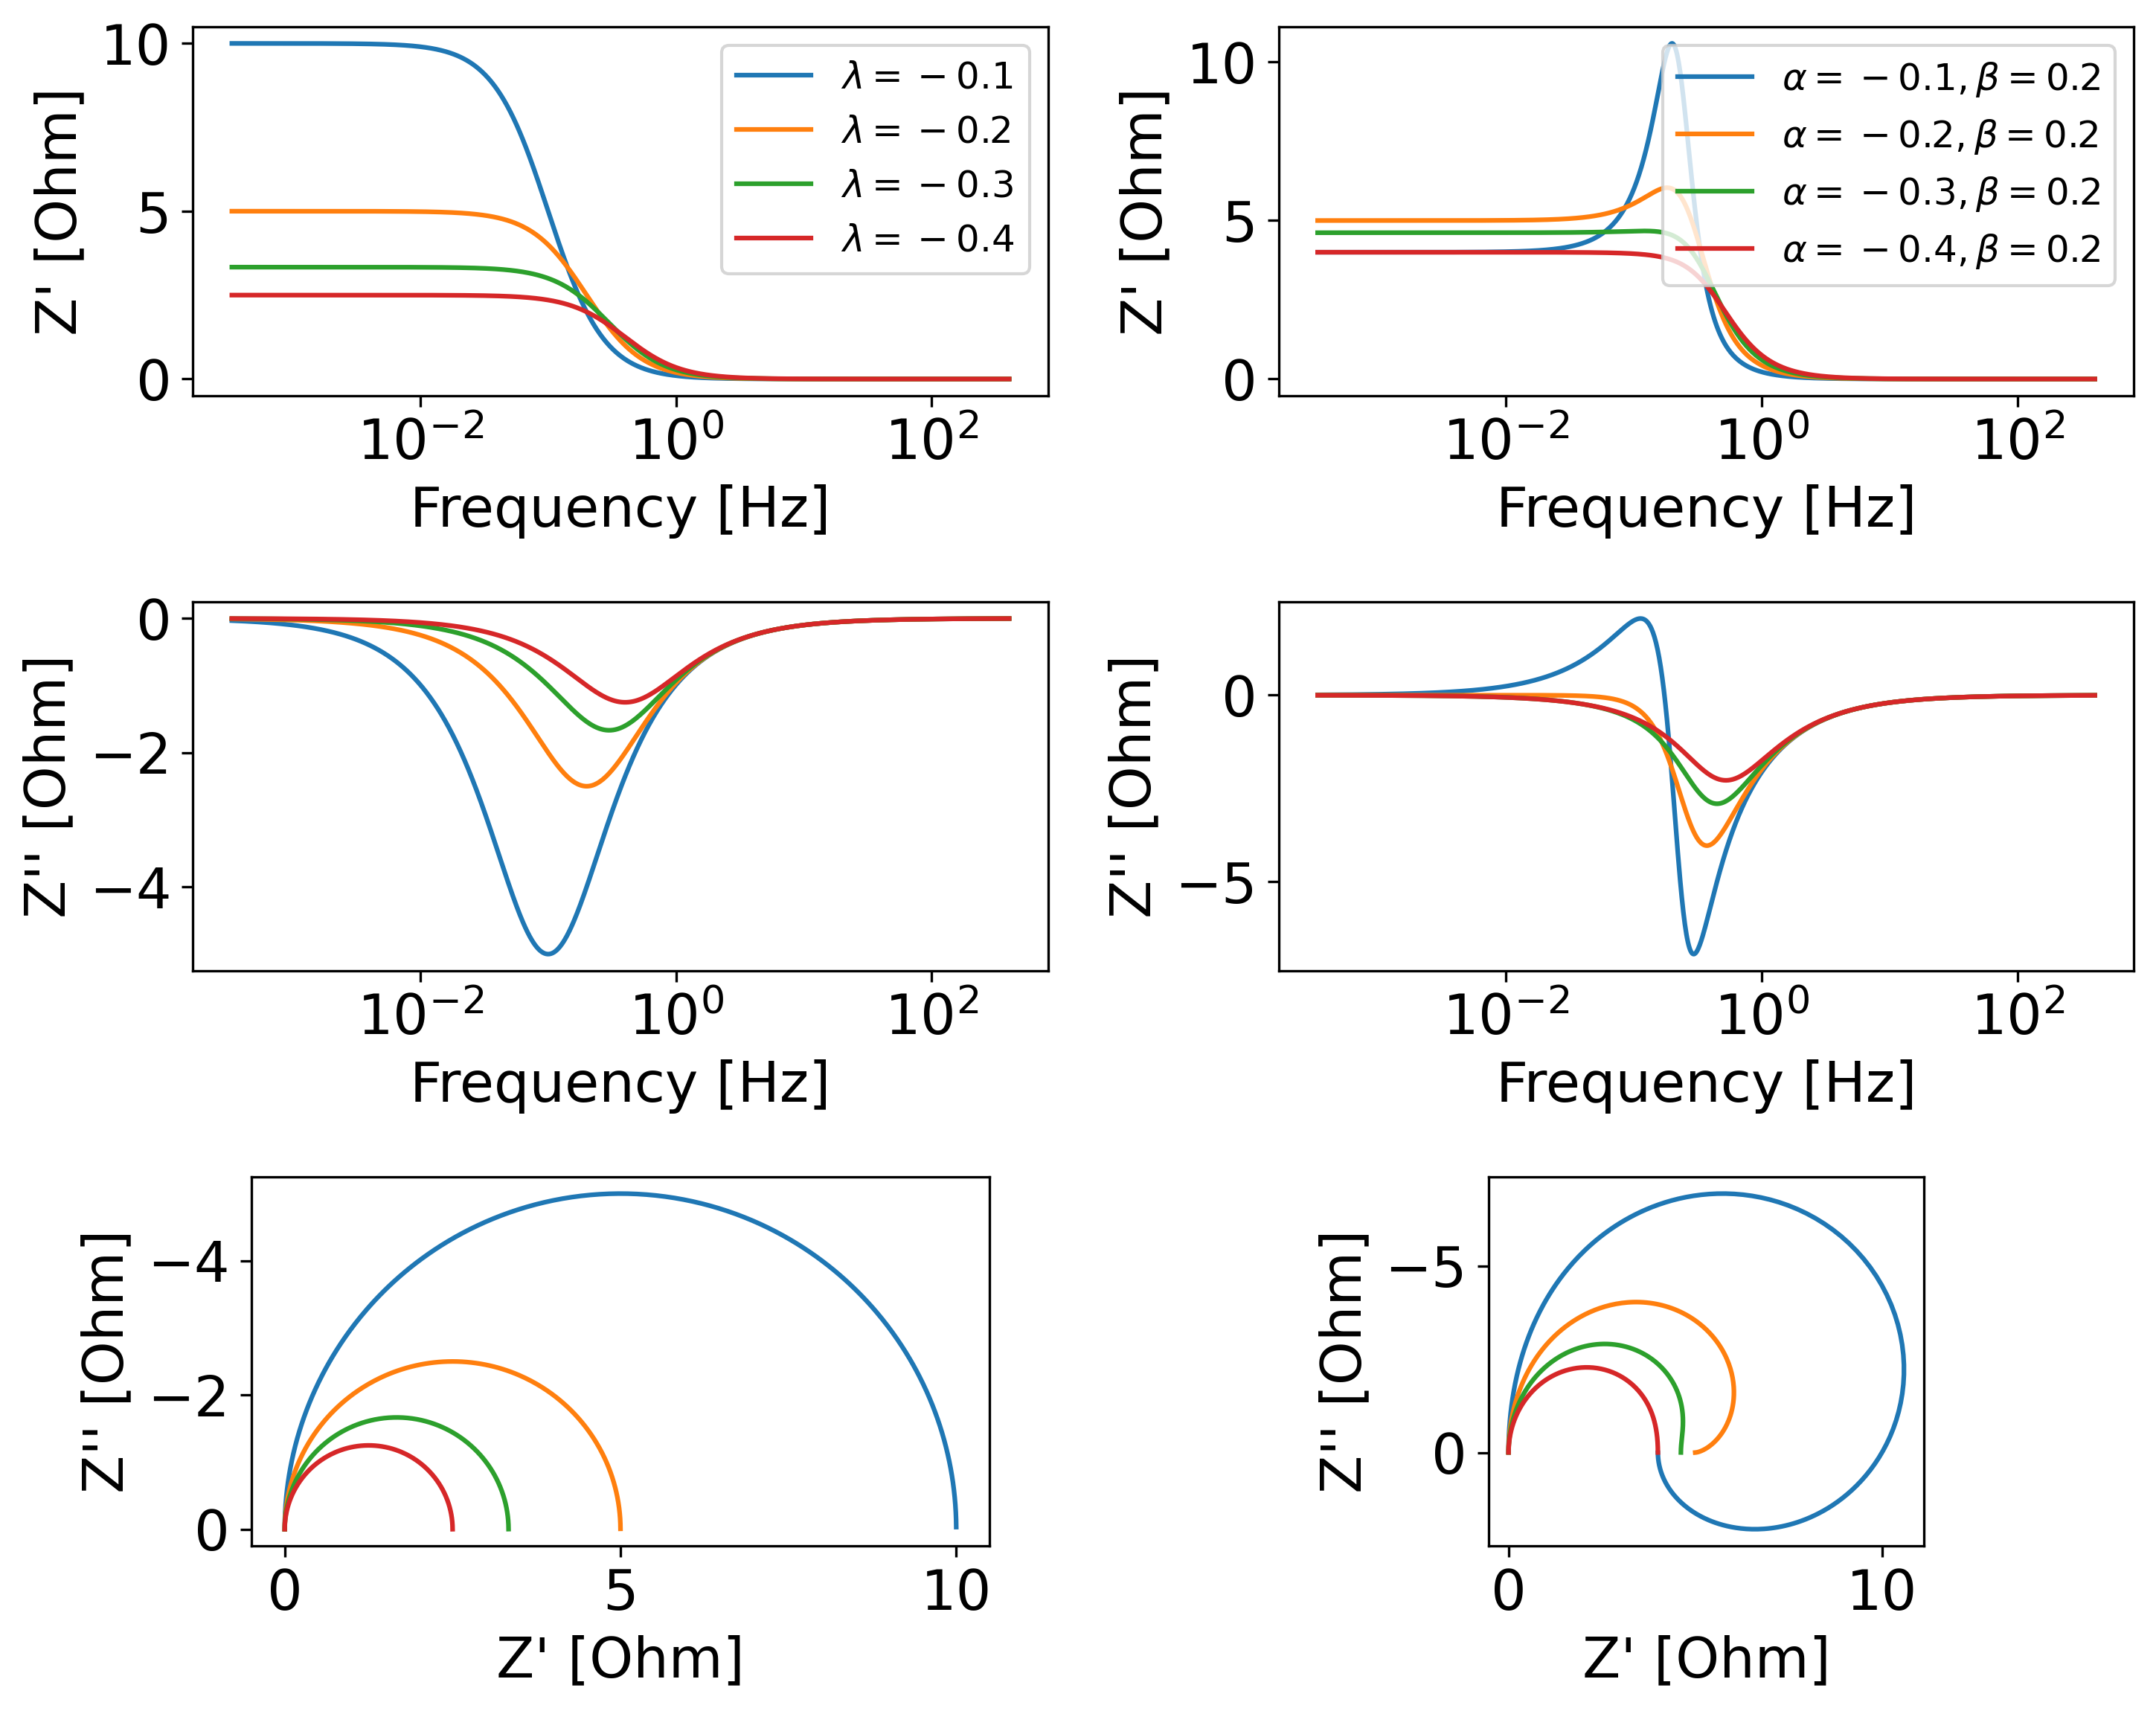

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams.update({'font.size': 18})

def RC_circuit(f,R,f0):
    return R / (1 + 1j*f/f0)

def RnC_circuit(f,R,f0):
    return R / (1 - 1j*f/f0)

def RL_circuit(f,R,f0):
    return 1j*f/f0*R / (1 + 1j*f/f0)

def pq_circuit(f,p,q):
    return q*p/(q**2+f**2) + 1j*f*p/(q**2+f**2)

def diag_system(s,omega,lamda,r):
    return (-1)**(r-1)*omega/(s-lamda)**r

def underdamped(s,omega,alpha,beta,r):
    return (-1)**(r-1)*omega/(s-(alpha+1j*beta))**r + (-1)**(r-1)*omega/(s-(alpha-1j*beta))**r

f = np.exp(np.linspace(-8,6,num=1000))

fig, axs = plt.subplots(3,2,figsize=(10,8),dpi=300)

axs[0][0].set_xscale('log')
axs[0][0].set_xlabel('Frequency [Hz]')
axs[0][0].set_ylabel("Z' [Ohm]")

axs[1][0].set_xscale('log')
axs[1][0].set_xlabel('Frequency [Hz]')
axs[1][0].set_ylabel("Z'' [Ohm]")
#axs[1].set_aspect('equal')

axs[2][0].set_aspect('equal')
axs[2][0].set_xlabel("Z' [Ohm]")
axs[2][0].set_ylabel("Z'' [Ohm]")
axs[2][0].invert_yaxis()

axs[0][1].set_xscale('log')
axs[0][1].set_xlabel('Frequency [Hz]')
axs[0][1].set_ylabel("Z' [Ohm]")

axs[1][1].set_xscale('log')
axs[1][1].set_xlabel('Frequency [Hz]')
axs[1][1].set_ylabel("Z'' [Ohm]")

axs[2][1].set_aspect('equal')
axs[2][1].set_xlabel("Z' [Ohm]")
axs[2][1].set_ylabel("Z'' [Ohm]")
axs[2][1].invert_yaxis()

lambdas = (-0.1,-0.2,-0.3,-0.4)

for i in range(len(lambdas)):
    Z = diag_system(1j*f,1,lambdas[i],1)
    axs[0][0].plot(f,Z.real,label = f'$\lambda = {lambdas[i]}$')
    axs[1][0].plot(f,Z.imag)
    axs[2][0].plot(Z.real,Z.imag)


alphas = (-0.1,-0.2,-0.3,-0.4)
betas = (0.2,0.2,0.2,0.2)

for i in range(len(lambdas)):
    Z = underdamped(1j*f,1,alphas[i],betas[i],1)
    axs[0][1].plot(f,Z.real,label = f'$\\alpha = {alphas[i]}, \\beta = {betas[i]}$')
    axs[1][1].plot(f,Z.imag)
    axs[2][1].plot(Z.real,Z.imag)


fig.tight_layout()

axs[0][0].legend(prop={'size': 12})
axs[0][1].legend(prop={'size': 12})

#Z_diag = underdamped(1j*f,1.0,-0.1,0.0,2)

#axs[0].plot(f,Z_diag.real)
#axs[1].plot(Z_diag.real,Z_diag.imag)

# Z_RC = RC_circuit(f,1,np.exp(2.5))

# axs[0].plot(f,Z_RC.real)
# axs[1].plot(f,Z_RC.imag)

# Z_nRnC = RC_circuit(f,-1,np.exp(2.5),)

# axs[0].plot(f,Z_nRnC.real+0.01)
# axs[1].plot(f,Z_nRnC.imag+0.01)

# Z_RnC = RC_circuit(f,1,-np.exp(2.5))

# axs[0].plot(f,Z_RnC.real+0.02)
# axs[1].plot(f,Z_RnC.imag+0.02)

# Z_nRC = RC_circuit(f,-1,-np.exp(2.5))

# axs[0].plot(f,Z_nRC.real+0.03,ls='--')
# axs[1].plot(f,Z_nRC.imag+0.03,ls='--')

# Z_pq = pq_circuit(f,np.exp(2.5),np.exp(2.5))

# axs[0].plot(f,Z_pq.real+0.04)
# axs[1].plot(f,Z_pq.imag+0.04)



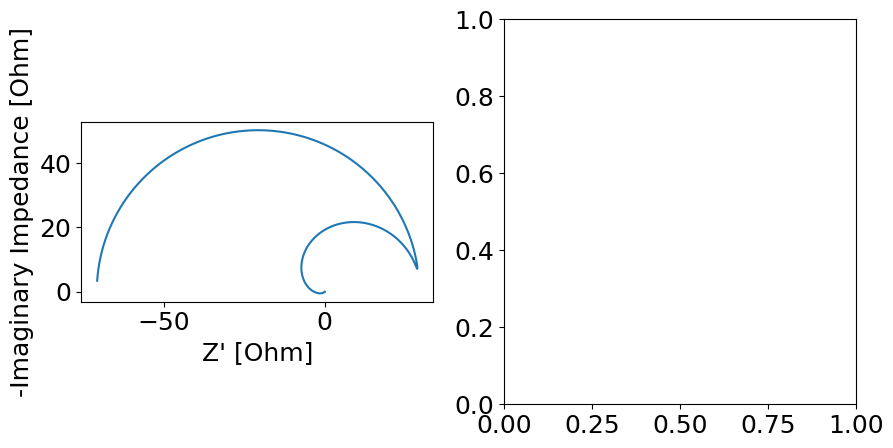

In [14]:
fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].set_xlabel("Z' [Ohm]")
axs[0].set_ylabel('-Imaginary Impedance [Ohm]')
axs[0].set_aspect('equal')


Z = diag_system(1j*f,10000,-7,3) + diag_system(1j*f,1,0.01,1)
axs[0].plot(Z.real,-Z.imag)
